# Task 2
Author: **Saikiran Rudra**

# 2. Prediction using Unsupervised ML

### ❓ Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN, KMeans

In [2]:
# Reading Data

df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
# Seperating Dependent and Independent Variables

df = df.drop(columns=["Id"])
X = df.loc[:, df.columns != "Species"]
y = df["Species"]

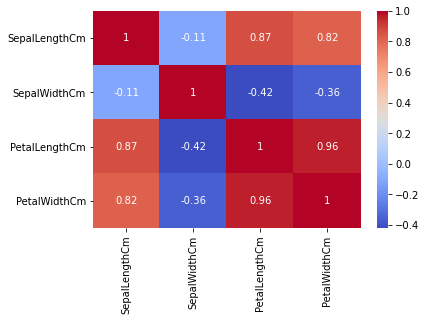

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

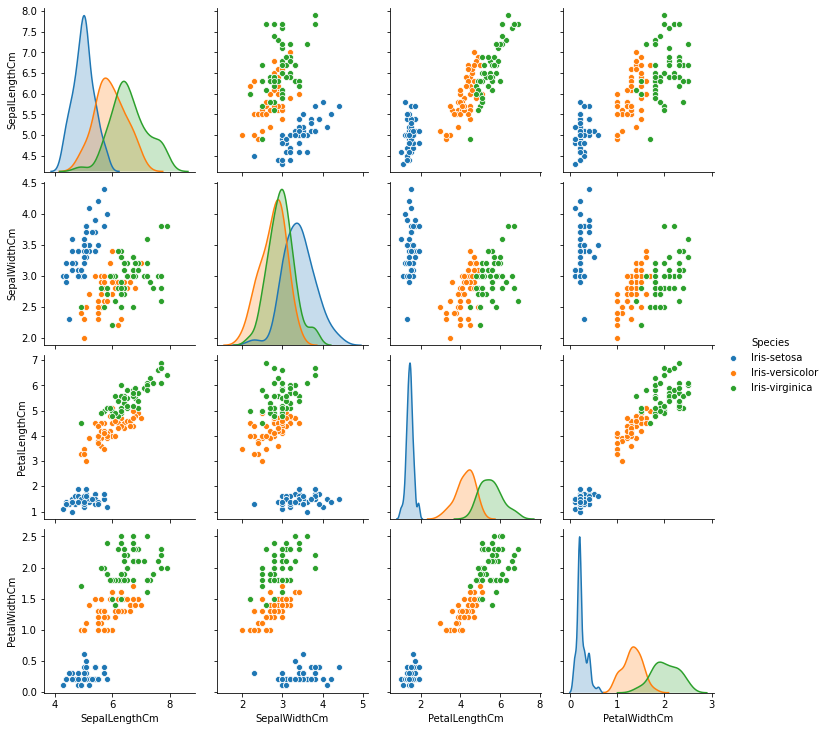

In [8]:
# fig, ax = plt.subplots(4,4,figsize=(16,16))
# fig.suptitle("Actual Clusters", fontsize=22)

# combs = list(itertools.product(df.columns, df.columns))

# counter = 0
# for i in range(4):
#     for j in range(4):
#         sns.scatterplot(x=combs[counter][0], y=combs[counter][1], data=df, hue=y, ax=ax[i][j], legend=False)
#         counter = counter + 1

sns.pairplot(df, hue="Species")

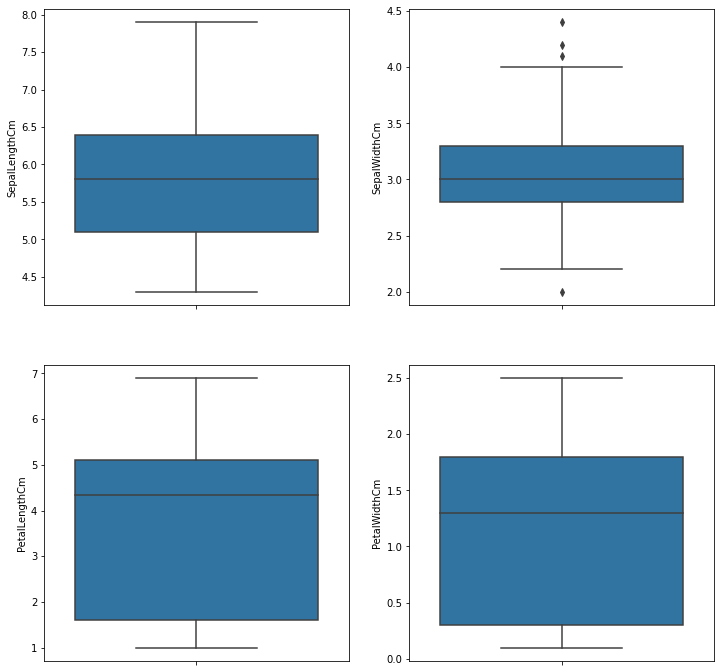

In [9]:
fix, ax = plt.subplots(2,2, figsize=(12,12))

sns.boxplot(y=X["SepalLengthCm"], ax=ax[0][0])
sns.boxplot(y=X["SepalWidthCm"], ax=ax[0][1])
sns.boxplot(y=X["PetalLengthCm"], ax=ax[1][0])
sns.boxplot(y=X["PetalWidthCm"], ax=ax[1][1])

## 🌟 Using DBSCAN for Clustring

In [10]:
db = DBSCAN(eps=1, min_samples=13).fit(X)

Text(0.5, 1.0, 'Actual Data')

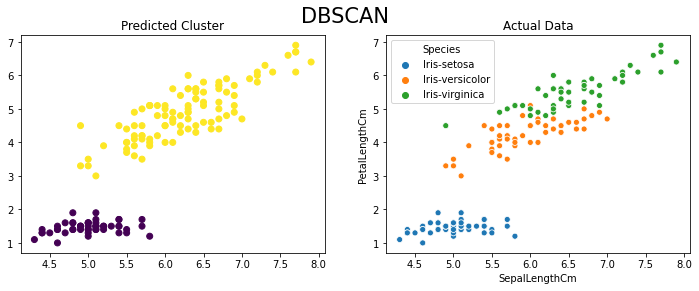

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.suptitle("DBSCAN", fontsize=21)

ax[0].scatter(df["SepalLengthCm"], df["PetalLengthCm"], c=db.labels_)
ax[0].set_title("Predicted Cluster")

sns.scatterplot(df["SepalLengthCm"], df["PetalLengthCm"], hue=y, ax=ax[1])
ax[1].set_title("Actual Data")

## 🌟 Using KMeans for Clustring

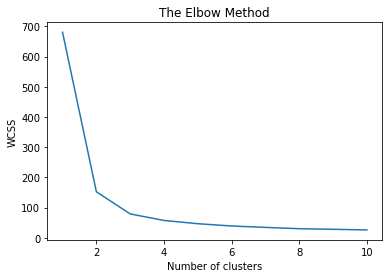

In [12]:
wcss = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X)

Text(0.5, 1.0, 'Actual Cluster')

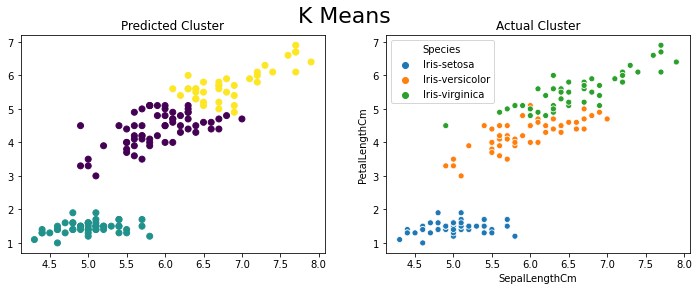

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.suptitle("K Means", fontsize=22)

ax[0].scatter(df["SepalLengthCm"], df["PetalLengthCm"], c=kmeans_labels)
ax[0].set_title("Predicted Cluster")

sns.scatterplot(df["SepalLengthCm"], df["PetalLengthCm"], hue=y, ax=ax[1])
ax[1].set_title("Actual Cluster")

# Thank You